# Imports 

In [36]:
import pandas as pd 
import numpy  as np

import matplotlib.pyplot as plt
import seaborn           as sns 

from sklearn.neighbors       import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.svm             import SVC
from sklearn.ensemble        import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Loading Data

In [21]:
bank_df = pd.read_csv('bank-full.csv', sep=';')
print(bank_df.shape)

(45211, 17)


In [22]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [23]:
bank_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [24]:
columns =  ['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'poutcome', 'y']
for column in columns:
    print(str(column) + ': ', bank_df[column].unique())
    print('')

job:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital:  ['married' 'single' 'divorced']

education:  ['tertiary' 'secondary' 'unknown' 'primary']

default:  ['no' 'yes']

housing:  ['yes' 'no']

loan:  ['no' 'yes']

contact:  ['unknown' 'cellular' 'telephone']

month:  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome:  ['unknown' 'failure' 'other' 'success']

y:  ['no' 'yes']



# EDA

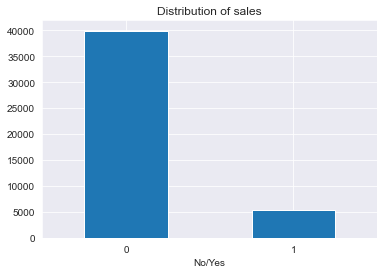

In [49]:
# Distribution of sales
sns.set_style('darkgrid')
bank_df['y_yes'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.title('Distribution of sales')
plt.xlabel('No/Yes')
plt.show()

# Data Preparation

In [25]:
# Create dummy variables 
print(bank_df.columns)
bank_df = pd.get_dummies(bank_df,drop_first=True)
print(bank_df.columns)

# Split Features and Target
X = bank_df.drop(['y_yes'], axis=1)
y = bank_df['y_yes']

# Standard Scaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state=42)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')


# Model Training - KNeighbors Classifier

In [26]:
# KNeighbors Classifier
param_grid = {'n_neighbors': [*range(7,15)]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid, cv=5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'n_neighbors': [7, 8, 9, 10, 11, 12, 13, 14]})

# Performance Metrics - KNeighbors Classifier

In [27]:
# Results
knn_pred = clf.predict(X_test)
print("Tuned KNeighbors Classifier Parameters: {}".format(clf.best_params_)) 
print("Best Accuracy is {}".format(clf.best_score_))
print()
print(confusion_matrix(y_test, knn_pred))
print()
print(classification_report(y_test, knn_pred))

Tuned KNeighbors Classifier Parameters: {'n_neighbors': 11}
Best Accuracy is 0.8943975735955032

[[11692   274]
 [ 1123   475]]

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.63      0.30      0.40      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.64      0.67     13564
weighted avg       0.88      0.90      0.88     13564



# Model Training - Logistic Regression

In [28]:
# Logistic Regression
param_grid = {'C': np.logspace(-5, 8, 15),'penalty': ['l2']}
lr = LogisticRegression(random_state=42,max_iter=7600)
logreg_cv = GridSearchCV(lr, param_grid, cv=5)
logreg_cv.fit(X_train,y_train)
logreg_pred = logreg_cv.predict(X_test)

# Performance Metrics - Logistic Regression

In [29]:
# Results
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best Accuracy is {}".format(logreg_cv.best_score_))
print()
print(confusion_matrix(y_test, logreg_pred))
print()
print(classification_report(y_test, logreg_pred))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213, 'penalty': 'l2'}
Best Accuracy is 0.9023920781916888

[[11659   307]
 [ 1051   547]]

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.64      0.34      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564



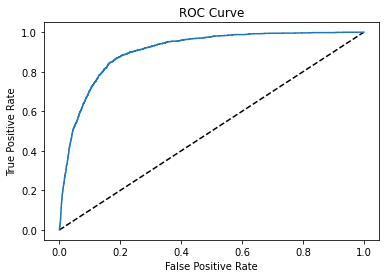

In [30]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Model Training - Support Vector Machine

In [31]:
svm = SVC(kernel = 'rbf',gamma='scale')
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)

# Performance Metrics - Support Vector Machine

In [32]:
# Results
print("R2: {}".format(svm.score(X_test, y_test)))
print()
print(pd.crosstab(y_test, svm_pred))
print()
print(classification_report(y_test, svm_pred))

R2: 0.9049690356826895

col_0      0    1
y_yes            
0      11716  250
1       1039  559

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11966
           1       0.69      0.35      0.46      1598

    accuracy                           0.90     13564
   macro avg       0.80      0.66      0.71     13564
weighted avg       0.89      0.90      0.89     13564



# Ensemble - Random Forest Classifier

In [33]:
# Hyperparameters to search
param_grid = {'max_depth': [5,10, 15], 'max_features': [5,10, 15], 'random_state': [42]}

# Find the best hyperparameters
rfr = RandomForestClassifier(n_estimators=200)
clf = GridSearchCV(rfr, param_grid, cv=5)
clf.fit(X_train, y_train)
randfor_pred = clf.predict(X_test)

print("Tuned Random Forest Regression Parameters: {}".format(clf.best_params_)) 
print("Best Accuracy is {}".format(clf.best_score_))

Tuned Random Forest Regression Parameters: {'max_depth': 10, 'max_features': 15, 'random_state': 42}
Best Accuracy is 0.9054572335224625


# Performance Metrics - Random Forest Classifier

In [34]:
# Results
print("Accuracy: {}".format(logreg_cv.score(X_test, y_test)))
print()
print(pd.crosstab(y_test, randfor_pred))
print()
print(classification_report(y_test, randfor_pred))

Accuracy: 0.8998820406959599

col_0      0    1
y_yes            
0      11631  335
1        979  619

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.65      0.39      0.49      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.68      0.72     13564
weighted avg       0.89      0.90      0.89     13564



# Ensemble

In [55]:
# Models with to their best parameters
lr = LogisticRegression(C= 0.05179474679231213, random_state=42 ,max_iter=7600, penalty= 'l2')
svm = SVC(kernel = 'rbf',gamma='scale')
rf = RandomForestClassifier(n_estimators=200, max_depth= 10, max_features= 15, random_state= 42)
knn = KNeighborsClassifier(n_neighbors=11)

classifiers = [('Logistic Regression', lr), ('Random Forests', rf), ('SVM', svm), ('KNN', knn)]

In [ ]:
#                                               ENSEBLE MODELS
# Voting Classifier
vc = VotingClassifier(estimators=classifiers)     
vc.fit(X_train, y_train)   
y_pred = vc.predict(X_test)
accuracy = vc.score(X_test,y_test)
print('All Models Voting Classifier: ', round(accuracy, 3))
print(pd.crosstab(y_test, y_pred))
print()

# Bagging Classifier
for clf_name, clf in classifiers: 
    bgg = BaggingClassifier(base_estimator=clf, n_estimators=50, oob_score=True, random_state=1)
    bgg.fit(X_train, y_train)
    y_pred = bgg.predict(X_test)
    accuracy = bgg.score(X_test,y_test)
    acc_oob = bgg.oob_score_
    print(clf_name, 'Test set accuracy: ', round(accuracy,3), 'OOB accuracy: ', round(acc_oob, 3))
    print(pd.crosstab(y_test, y_pred))
    print()

# Boosting 

In [ ]:
#                                          BOOSTING CLASSIFIERS
# AdaBoost Classifier
classifiers = [('Logistic Regression', lr), ('Random Forests', rf), ('SVM', svm)]
for clf_name, clf in classifiers: 
    ada = AdaBoostClassifier(base_estimator=clf, n_estimators=100, random_state=1, algorithm='SAMME')
    ada.fit(X_train,y_train)
    y_pred = ada.predict(X_test)
    accuracy = ada.score(X_test,y_test)
    print(clf_name, 'AdaBoost Test set accuracy: ', round(accuracy,3))
    print(pd.crosstab(y_test, y_pred))
    print()
    
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(max_depth=4, n_estimators=200, random_state=2)
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
accuracy = gb.score(X_test,y_test)
print('Gradient Boosting Test set accuracy:', round(accuracy, 3))
print(pd.crosstab(y_test, y_pred))
print()

# Performance Metrics

In [ ]:
# Create a pd.Series of features importances
ada = AdaBoostClassifier(base_estimator=rd, n_estimators=180, random_state=1)
ada.fit(X_train,y_train)
importances = pd.Series(data=ada.feature_importances_, index= cancer_df.drop(['id','diagnosis'], axis=1).copy().columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances', fontsize=20)
plt.yticks(fontsize=20)
plt.show()